In [0]:
from bs4 import BeautifulSoup
import requests
import re

# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
# link = 'https://cdn.aws.singtel.com/annualreport/2019/pages/financial-highlights.html'
# https://stackabuse.com/text-summarization-with-nltk-in-python/

article_text = ''

#For chairman review
link_chairman = 'https://cdn.aws.singtel.com/annualreport/2019/pages/chairmans-message.html'

the_page_chairman = requests.get(link_chairman).content
html_tags_chairman = BeautifulSoup(the_page_chairman, features="html.parser")

paragraphs_chairman = html_tags_chairman.findAll('p', {'class': ''})

for p in paragraphs_chairman:
    article_text += ' ' + p.text
    

#For GCEO review

link = 'https://cdn.aws.singtel.com/annualreport/2019/pages/gceo-review.html'

the_page = requests.get(link).content
html_tags = BeautifulSoup(the_page, features="html.parser")

paragraphs = html_tags.findAll('p', {'class': ''})

for p in paragraphs:
    article_text += ' ' + p.text
    
print(article_text)

#For financial highlights
# p_4 = html_tags.findAll('h4')
# print(len(p_4))
# p_3 = html_tags.findAll('h3')
# print(len(p_3))
# p_5 = html_tags.findAll('h5')
# print(len(p_5))

 Dear Shareholders, FY 2019 was more than just a challenging year. I would characterise it as somewhat of a ‘perfect storm’ with intensifying competition across all markets, particularly India and Indonesia, plus the added backdrop of heightened economic uncertainty. These factors, coupled with regional currencies moving significantly against us and reduced contributions from our smaller stake in NetLink Trust, contributed to a 21% decline in our underlying net profit to S$2.83 billion. Your Board has proposed the payment of a final dividend of 10.7 cents per share. If approved, this will bring the total full year dividend to 17.5 cents per share. Last year, I signalled that competition was escalating across the region, with operators aggressively competing for market share. In India, we have seen an unprecedented situation, where a new entrant investing more than US$40 billion, has waged a price war, driving the industry into losses. While this has been painful in the short term, we h

In [0]:
# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text)
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import nltk

sentence_list = sent_tokenize(article_text)

stopwords = nltk.corpus.stopwords.words('english')
word_frequencies = {}

for word in word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
            
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word] / maximum_frequncy)
    
    
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
     
print(sentence_scores)

{' Dear Shareholders, FY 2019 was more than just a challenging year.': 0.9230769230769231, 'I would characterise it as somewhat of a ‘perfect storm’ with intensifying competition across all markets, particularly India and Indonesia, plus the added backdrop of heightened economic uncertainty.': 3.000000000000001, 'Your Board has proposed the payment of a final dividend of 10.7 cents per share.': 1.3846153846153846, 'If approved, this will bring the total full year dividend to 17.5 cents per share.': 2.230769230769231, 'Last year, I signalled that competition was escalating across the region, with operators aggressively competing for market share.': 3.6923076923076925, 'In India, we have seen an unprecedented situation, where a new entrant investing more than US$40 billion, has waged a price war, driving the industry into losses.': 2.923076923076923, 'While this has been painful in the short term, we have arrived at a three-player market, creating a better long-term market structure for 

In [0]:
import heapq

summary_sentences = heapq.nlargest(15, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

print(summary)

We are also pursuing new growth by developing a regional digital ecosystem that unlocks the value of the Group’s 690 million strong customer base. Globe had a stellar year with robust revenue share growth in mobile and broadband, and AIS continued to lead the market in Thailand. We are also leveraging our regional scale and partnerships to drive a digital ecosystem across our mobile customer base of more than 690 million. Our consumer businesses gained mobile market share in both countries as our investments in networks, content and digitalisation paid off. As governments race to build smart cities and enterprises future-proof their operations, we will leverage this rising tide of digitalisation to drive growth in our ICT and digital businesses. While this has been painful in the short term, we have arrived at a three-player market, creating a better long-term market structure for when the market normalises. Our efforts to stay relevant to customers through digitalisation paid off as o

In [0]:
#Summary with key figures

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import nltk

sentence_list = sent_tokenize(article_text)
stopwords = nltk.corpus.stopwords.words('english')
word_frequencies = {}


sentence_scores = {}

summary = ''
for sent in sentence_list:
    sent = sent.replace('5G', '')
    sent = sent.replace('2019', '')
    if bool(re.search(r'\d', sent)):
        summary = summary + sent + '\n\n'
        
print(summary)
      

With currency headwinds and the exceptional gain recorded last year from our NetLink Trust divestment, net profit dropped 44% to S$3.1 billion.

Our underlying net profit declined 21%.

Having invested in deepening our capabilities in cyber security, cloud, data analytics and IoT, ICT services now constitute 48% of our enterprise revenue.

We are also pursuing new growth by developing a regional digital ecosystem that unlocks the value of the Group’s 690 million strong customer base.

These factors, coupled with regional currencies moving significantly against us and reduced contributions from our smaller stake in NetLink Trust, contributed to a 21% decline in our underlying net profit to S$2.83 billion.

Your Board has proposed the payment of a final dividend of 10.7 cents per share.

If approved, this will bring the total full year dividend to 17.5 cents per share.

In India, we have seen an unprecedented situation, where a new entrant investing more than US$40 billion, has waged a p

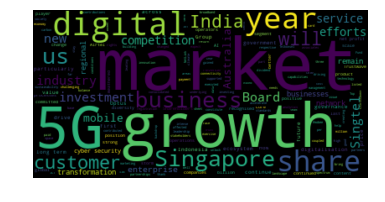

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(article_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
pip install PyPDF2

     |████████████████████████████████| 81kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
#2018 annual report with pdf
from PyPDF2 import PdfFileReader

text = ''

with open('02Singtel_Annual_Report_2018.pdf', 'rb') as file_input, open('pdf_text.txt', 'w') as text_file:
    read_pdf = PdfFileReader(file_input, strict=False)

    number_of_pages = read_pdf.getNumPages()
    for page_number in range(8, 13 ):  
        page_content = read_pdf.getPage(page_number).extractText()
        text = text + page_content
        new_content = ''.join([i if ord(i) < 128 else ' ' for i in page_content])

        text_file.write(new_content)
        


In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import nltk

sentence_list = sent_tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
word_frequencies = {}


sentence_scores = {}

summary = ''
for sent in sentence_list:
#     sent = sent.replace('5G', '')
#     sent = sent.replace('2018', '')
    if bool(re.search(r'\d', sent)):
        summary = summary + sent + '\n\n'
        
print(summary)

6Dear Shareholders,Singtel delivered a record pro˛t of S$5.45 billion for the 
year just ended, with the successful IPO of NetLink Trust.

However, underlying earnings declined 8%, largely the 
result of a decline in Airtel™s India earnings and charges 
from increased network investments and spectrum.

We are now entering an era of heightening competition, 
with the entry of new mobile operators across a number 
of our markets Œ a fourth operator in both Singapore 
and Australia, a possible third operator in the Philippines 
and an aggressive new player in India which has 
been described as the world™s largest start-up with an 
investment in the order of US$30 billion.In India, Airtel is navigating a brutal price war led by 
the new entrant that has seen the number of operators 
reduced from more than a dozen to four in two years.

We have implemented 4.5G and are trialling 5G.

This provides critical insight into operations, drives 
e˚ciency, improves agility and positions us well for